# Cross validation

台新分析開發環境案客戶資料
https://drive.google.com/drive/u/2/folders/1AAXWPcB9xiDe_qX87ce5XL-utkASWxRe

請先連到這個分享資料夾，並且按下右鍵，加入你的 Google 雲端硬碟


In [1]:
# 這個是授權存取你的 Google 雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# 確認真的連上了資料
!ls drive/My\ Drive/台新分析開發環境案客戶資料

'Copy of 0606_口述台新資料欄位.m4a'
'Copy of 0610_嘉駿寄來的欄位內容.png'
'Copy of 0621_data_original.zip'
'Copy of profile.csv'
'Copy of profile.gsheet'
'Copy of result_y1.csv'
'Copy of result_y1.gsheet'
'Copy of result_y2.csv'
'Copy of sr_1.csv'
'Copy of sr_2.csv'
'Copy of sr_3.csv'
'Copy of sr_4.csv'
'Copy of status.csv'
'Copy of visa-merchant-data-standards-manual_用來對照sr_1.csv中的mcc欄位.pdf'
'Copy of zip 對照表.xlsx'
'Copy of 檔案欄位說明_MOOCS.XLSX'


In [0]:
# 正式開始
import pandas as pd
import os.path
import numpy as np

In [0]:
DATA_DIR='drive/My Drive/台新分析開發環境案客戶資料'
status_fn = os.path.join(DATA_DIR, 'Copy of status.csv')
status_df = pd.read_csv(status_fn)
profile_fn = os.path.join(DATA_DIR, 'Copy of profile.csv')
profile_df = pd.read_csv(profile_fn)

In [5]:
status_df.head()

,YYYYMM,CUST_NO,py_a,py_b,py_c,py_d,py_e,py_f,py_g,py_h,py_i,py_j,py_k,py_l,as_a,as_b,as_c,as_d,as_e,as_f,as_g,as_h,as_i,as_j,as_k,as_l,as_m,as_n,scr
0,201807,9519340,24858,3014,4311,0,26422,21844,109323.0,105073.0,0.0,92955.0,4135.0,0.0,30,30,0,0,0,0,0,0,0,0,0,0,NaN,31416,419.0
1,201808,9519340,26422,3676,1473,0,24544,22747,108583.0,109323.0,0.0,97804.0,2130.0,0.0,30,30,0,0,0,0,0,0,0,0,0,0,NaN,31416,419.0
2,201809,9519340,24544,3693,4520,0,25620,20851,114245.0,108583.0,0.0,93801.0,814.0,0.0,30,30,0,0,0,0,0,0,0,0,0,0,NaN,31416,419.0
3,201810,9519340,25620,3515,8407,0,30798,22106,118071.0,114245.0,0.0,102422.0,1441.0,0.0,30,30,0,0,0,0,0,0,0,0,0,0,NaN,31416,419.0
4,201811,9519340,30798,3958,5309,0,32544,26840,122021.0,118071.0,0.0,105505.0,721.0,0.0,30,30,0,0,0,0,0,0,0,0,0,0,NaN,31416,315.0


In [0]:
profile_df.set_index('CUST_NO', inplace=True)

In [7]:
profile_df.head()

,c_gender,n_age,c_zip,c_edu,c_mry,c_job,c_occp,a_incm_flg,x_flg_house,CAR_FLG
CUST_NO,,,,,,,,,,
21969,M,48,110,4,S,106,901,6,1.0,0
24081,M,42,100,4,S,106,504,4,7.0,2
37917,M,59,100,5,S,508,0,5,99.0,2
38277,M,59,104,3,M,511,1101,3,9.0,2
38312,M,59,406,5,S,103,813,4,2.0,2


In [0]:
import re
pys = re.findall(r"\S+", "py_a	py_b	py_c	py_d	py_e	py_f	py_g	py_h	py_i	py_j	py_k	py_l")

In [9]:
status_mean_df = status_df[['CUST_NO'] + pys].groupby('CUST_NO').mean()
status_mean_df.head()

,py_a,py_b,py_c,py_d,py_e,py_f,py_g,py_h,py_i,py_j,py_k,py_l
CUST_NO,,,,,,,,,,,,
21969,13664.833333,14206.333333,14206.000000,0.0,13664.833333,0.0,12152.666667,15818.833333,0.0,0.0,0.000000,0.0
24081,31912.500000,32696.333333,33099.833333,0.0,32316.000000,0.0,12512.666667,13963.833333,0.0,0.0,1935.833333,0.0
37917,9684.000000,9724.500000,6647.166667,0.0,6606.666667,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
38277,8658.500000,9266.000000,9334.000000,0.0,8726.500000,0.0,7637.833333,35154.333333,0.0,0.0,0.000000,0.0
38312,294.833333,294.833333,209.500000,0.0,209.500000,0.0,3325.166667,3120.833333,0.0,0.0,0.000000,0.0


In [10]:
# 檢查是否有 NA
status_mean_df.isna().any()

py_a    False
py_b    False
py_c    False
py_d    False
py_e    False
py_f    False
py_g     True
py_h     True
py_i     True
py_j     True
py_k     True
py_l     True
dtype: bool

In [0]:
status_mean_df.fillna(0, inplace=True)

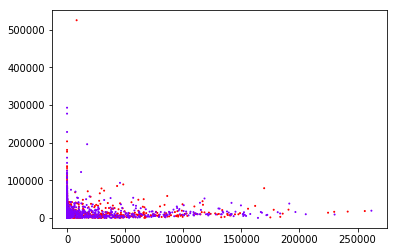

In [12]:
import matplotlib.pyplot as plt
y = profile_df.c_gender[status_mean_df.index]
X = status_mean_df[['py_f', 'py_c']].values.astype('float')
y2 = (y =='M')
# 標出 sample 點
plt.scatter(X[:10000,0], X[:10000, 1],  c=y2[:10000], cmap=plt.cm.rainbow, zorder=10, s=1);


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(status_mean_df, y2, test_size=0.95, random_state=42)

In [85]:
X_train.shape

(12454, 12)

In [86]:
X_test.shape

(236635, 12)

In [87]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(np.array(X_train), np.int64(y_train) )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6377870563674322
0.6327043759376254


In [91]:
m, s = X_train.mean(), X_train.std()
model.fit(np.array( (X_train-m)/s ), np.int64(y_train) )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
print(model.score((X_train-m)/s, y_train))
print(model.score((X_test-m)/s, y_test))

0.6387506022161554
0.6334650410970482


In [77]:
from sklearn.svm import SVC
model = SVC()
model.fit(np.array(X_train), np.int64(y_train) )

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [78]:
model.score(X_train, y_train)

0.9979926128151598

In [79]:
model.score(X_test[:10000], y_test[:10000])

0.6258

In [107]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(512, 128, 32), activation='relu')
m, s = X_train.mean(), X_train.std()
model.fit(np.array( (X_train-m)/s ), np.int64(y_train) )
print(model.score((X_train-m)/s, np.int64(y_train)))
print(model.score((X_test-m)/s, np.int64(y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: ignored

In [108]:
print(model.score((X_train-m)/s, np.int64(y_train)))
print(model.score((X_test-m)/s, np.int64(y_test)))

0.6691089387156994
0.6196304548556747


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(status_mean_df, y2, test_size=0.95, random_state=42)

In [71]:
X_train.shape

(12454, 12)

In [0]:
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Dropout, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential([
                    Dense(128, input_shape=(12,), use_bias=False),
                    BatchNormalization(),
                    LeakyReLU(),
                    Dense(2048, use_bias=False),
                    BatchNormalization(),
                    LeakyReLU(),
                    Dense(256, use_bias=False),
                    BatchNormalization(),
                    LeakyReLU(),
                    #Dropout(0.5),
                    Dense(256, use_bias=False),
                    BatchNormalization(),
                    LeakyReLU(),
                    #Dropout(0.5),
                    Dense(128, use_bias=False),
                    BatchNormalization(),
                    LeakyReLU(),                   

                    Dense(1, activation='sigmoid'),
])



In [0]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])